In [1]:
import os
import requests
import pandas
import datetime
import matplotlib.pylab as plt
import seaborn

In [2]:
# Set up figure defaults
plt.rc('image', cmap='gray', interpolation='nearest')  # Display all images in b&w and with 'nearest' interpolation
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Grab the data from the BFS website
# https://www.bfs.admin.ch/bfs/de/home/statistiken/bevoelkerung/geburten-todesfaelle.assetdetail.12727517.html
if not os.path.isfile('master'):
    csv = requests.get('https://www.bfs.admin.ch/bfsstatic/dam/assets/12727517/master')
    file = open('master', 'wb')
    file.write(csv.content)
    file.close()

In [4]:
# Read the data
data = pandas.read_csv('master', sep=';', low_memory=False)

In [5]:
# Generate week column from data
# We have to artificially add a fake weekday to make it nicely parseable
data['ISOWEEK'] = [datetime.datetime.strptime(t + '-1', '%G-W%V-%w') for t in data['TIME_PERIOD']]

In [6]:
# How is the age data saved?
data['AGE'].unique()

array(['_T', 'Y0T4', 'Y10T14', 'Y15T19', 'Y20T24', 'Y25T29', 'Y30T34',
       'Y35T39', 'Y40T44', 'Y45T49', 'Y50T54', 'Y55T59', 'Y60T64',
       'Y65T69', 'Y70T74', 'Y75T79', 'Y80T84', 'Y85T89', 'Y_GE90', 'Y5T9'],
      dtype=object)

In [7]:
# Drop the '_T' age, we don't know what it is :)
data.drop(data.index[data['AGE'] == '_T'], inplace = True)

In [8]:
# Rename the young ages to help with sorting
data.replace('Y0T4','Y00T04', inplace=True)
data.replace('Y5T9','Y05T09', inplace=True)

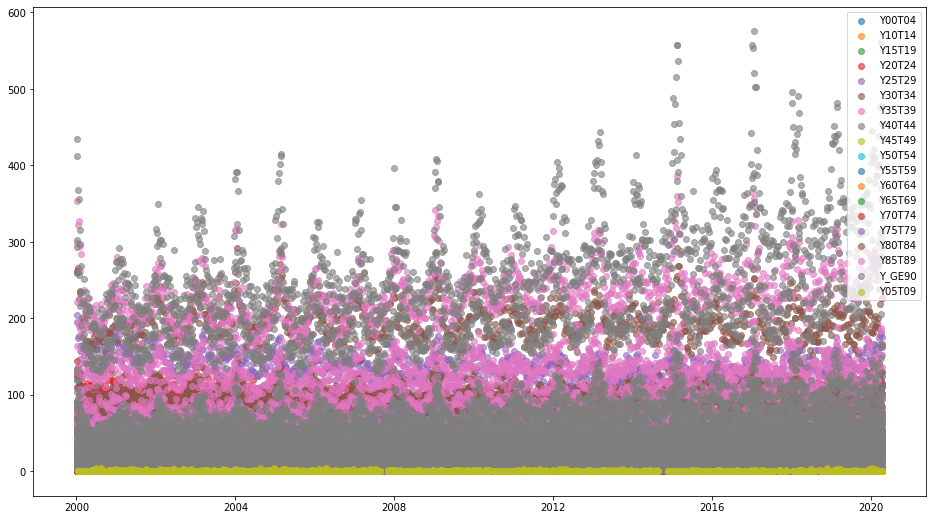

In [9]:
# Plot the data for each age
for age in data['AGE'].unique():
    plt.scatter(data[data.AGE==age]['ISOWEEK'], data[data.AGE==age]['Obs_value'], label=age, alpha=.618)
plt.legend(loc='upper right')
plt.show()

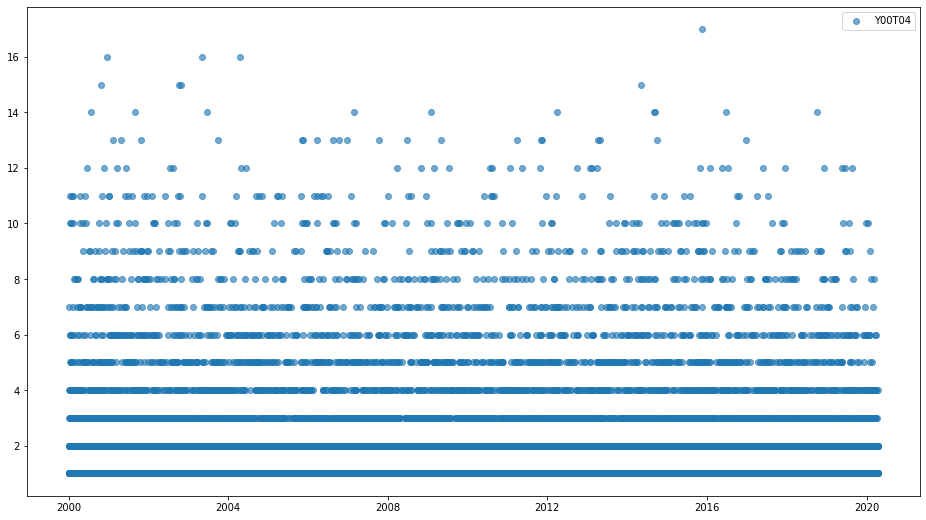

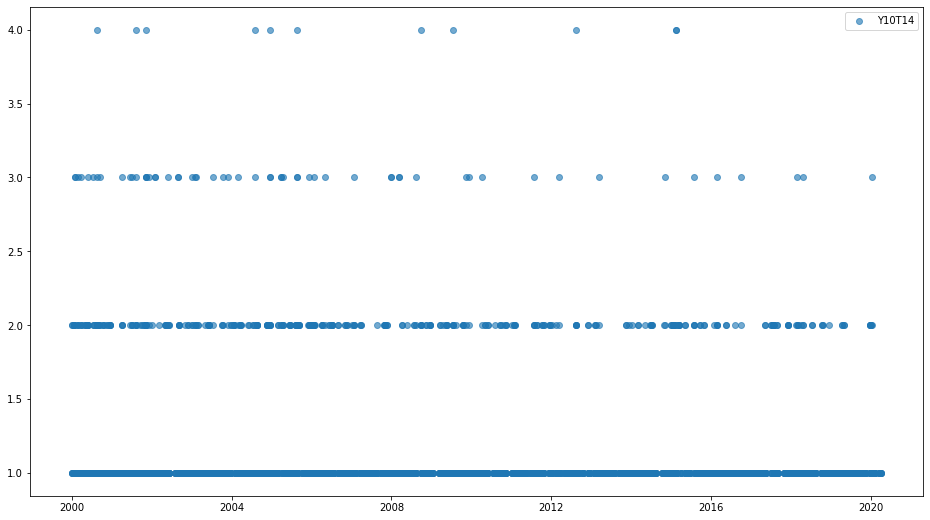

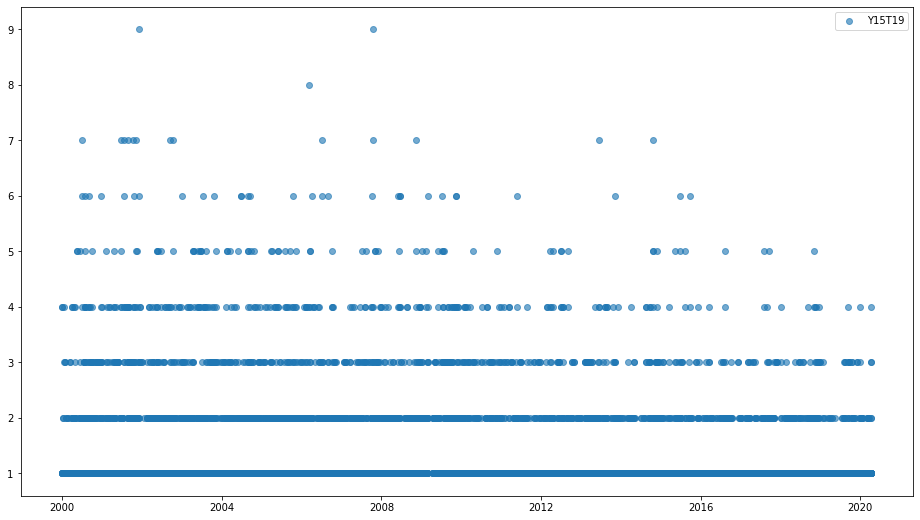

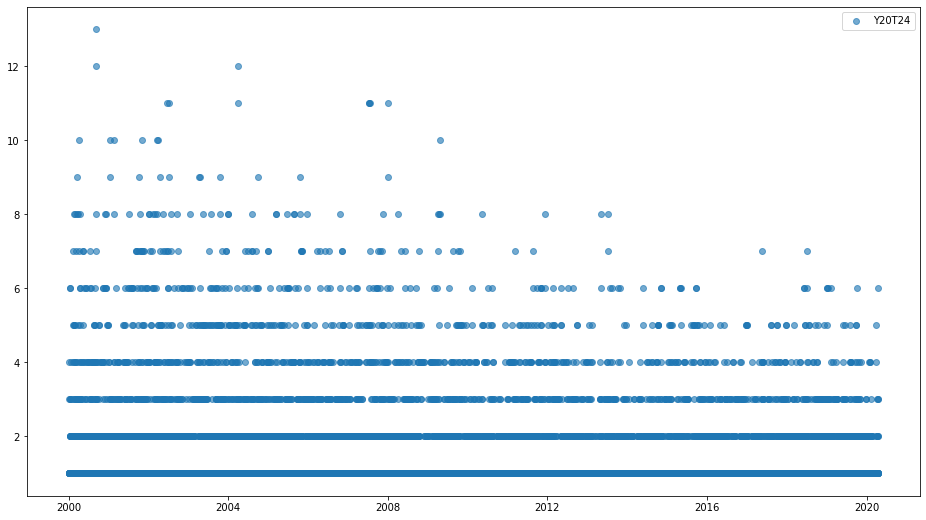

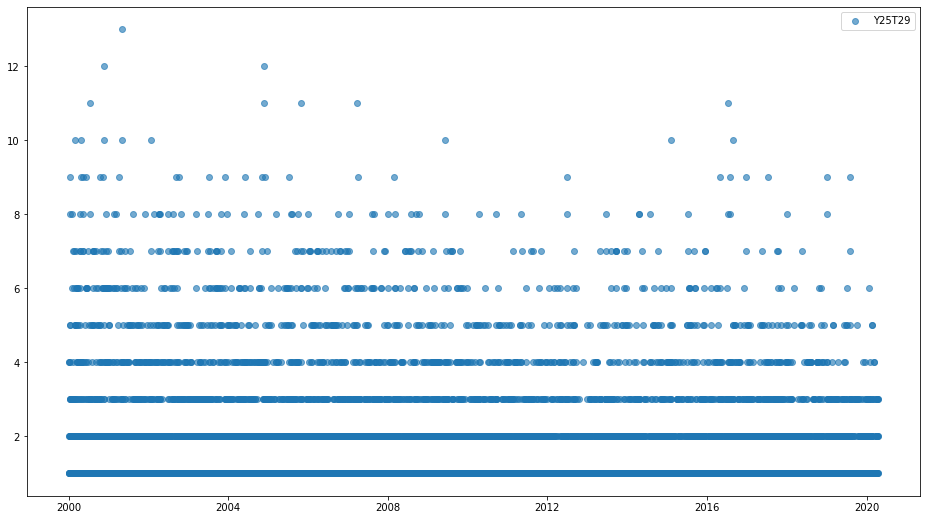

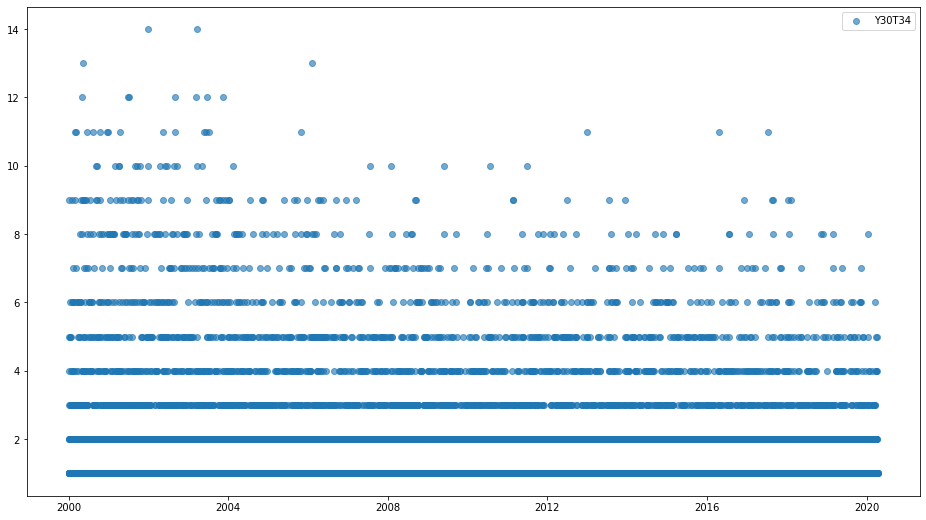

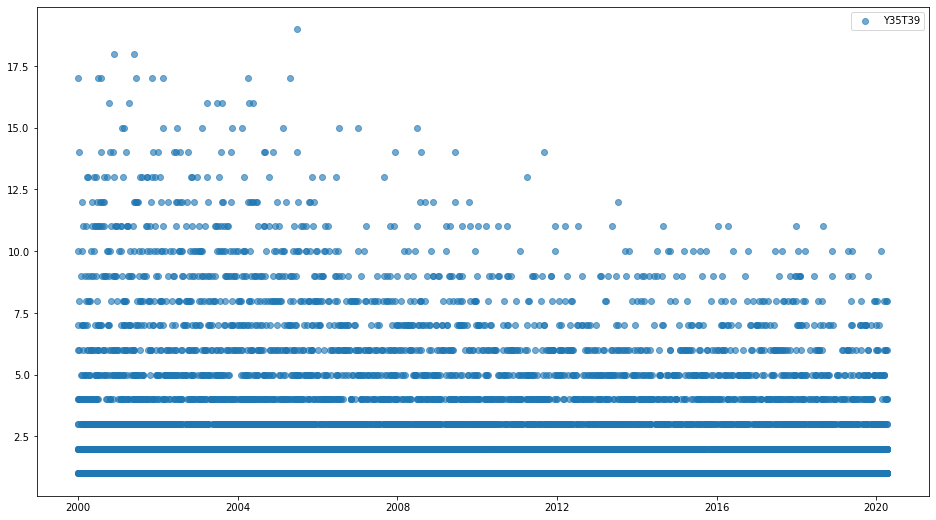

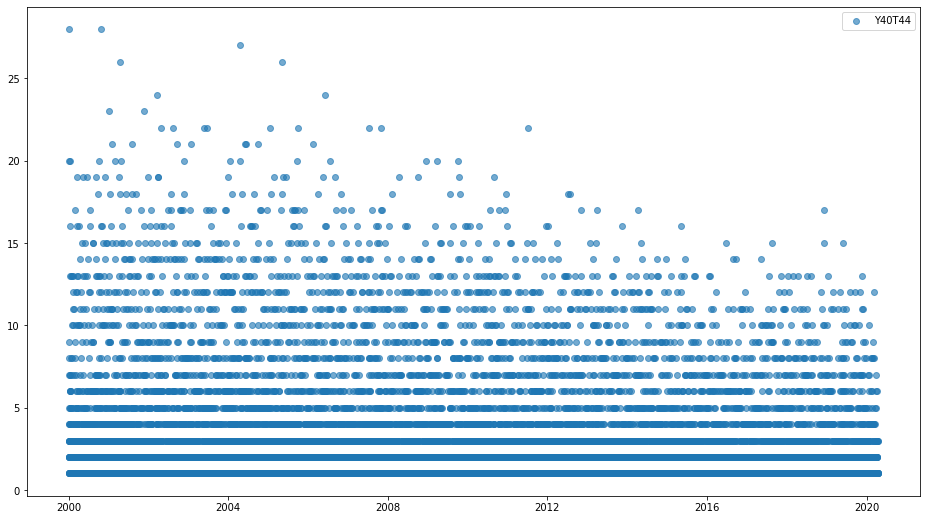

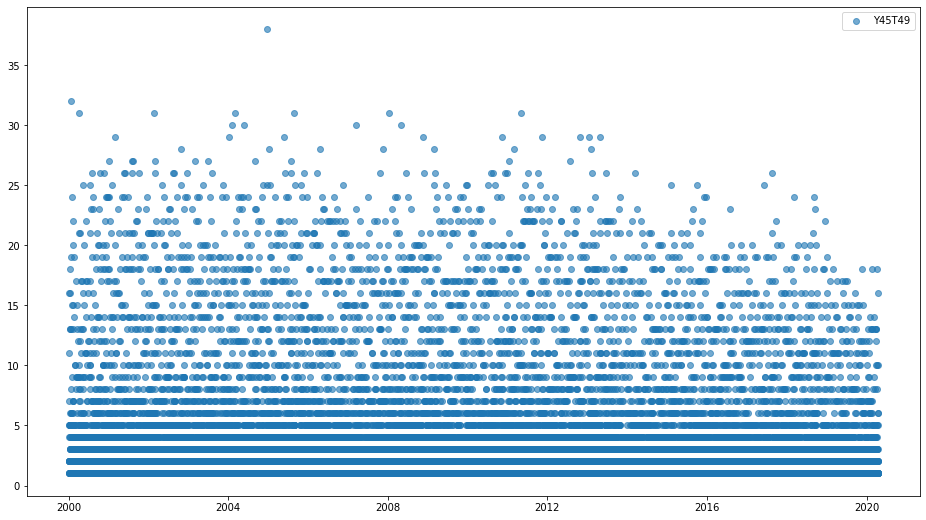

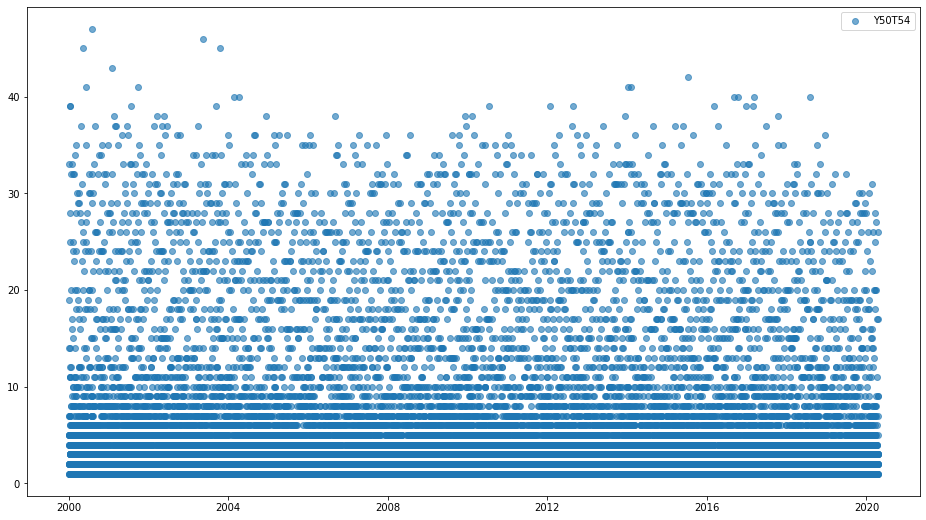

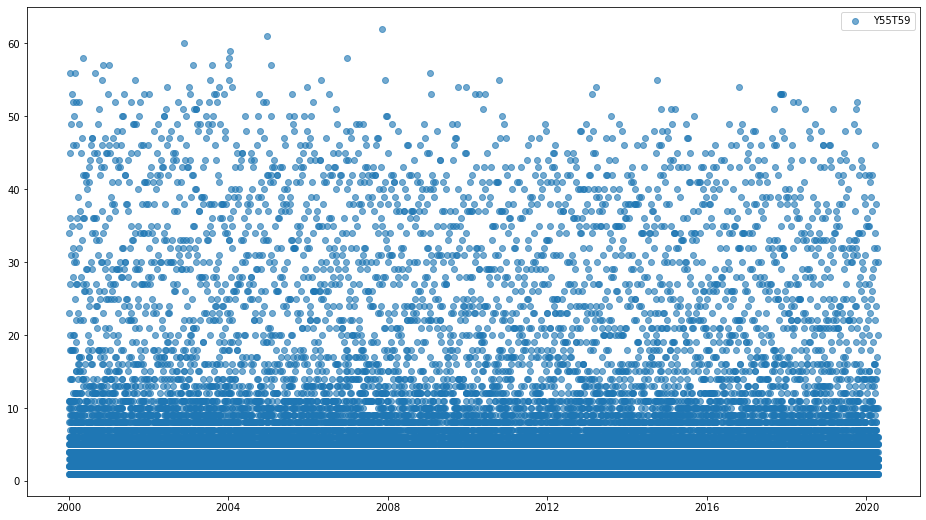

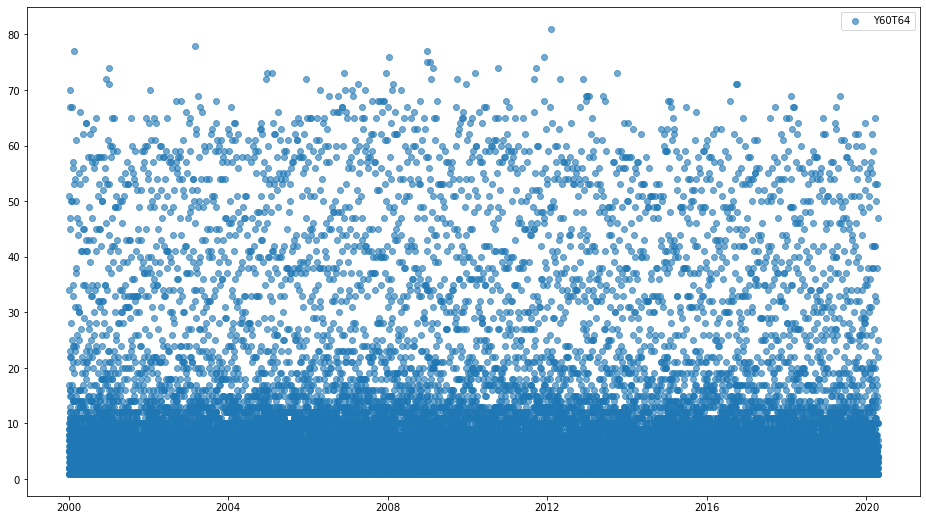

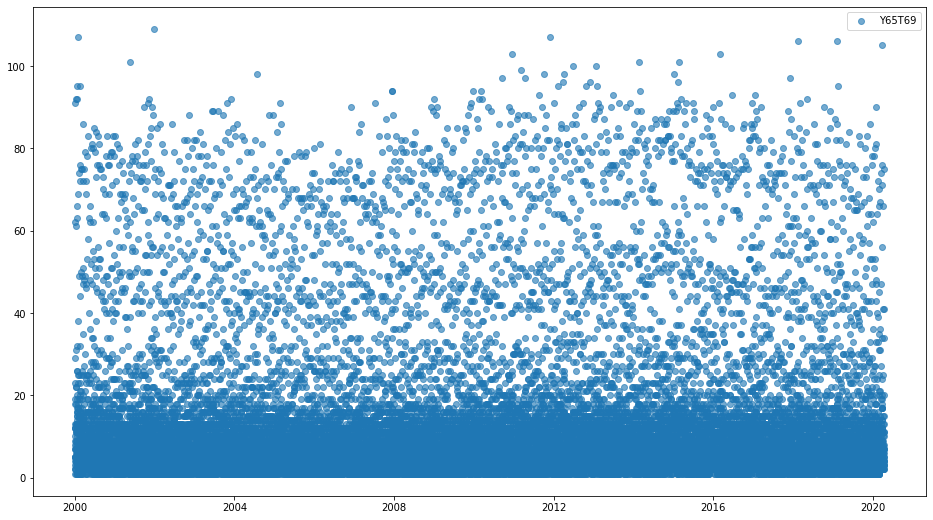

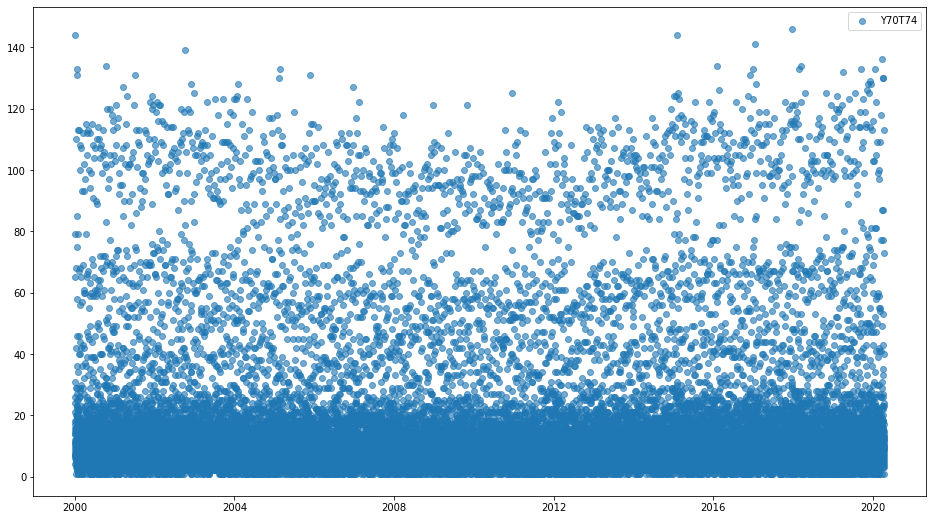

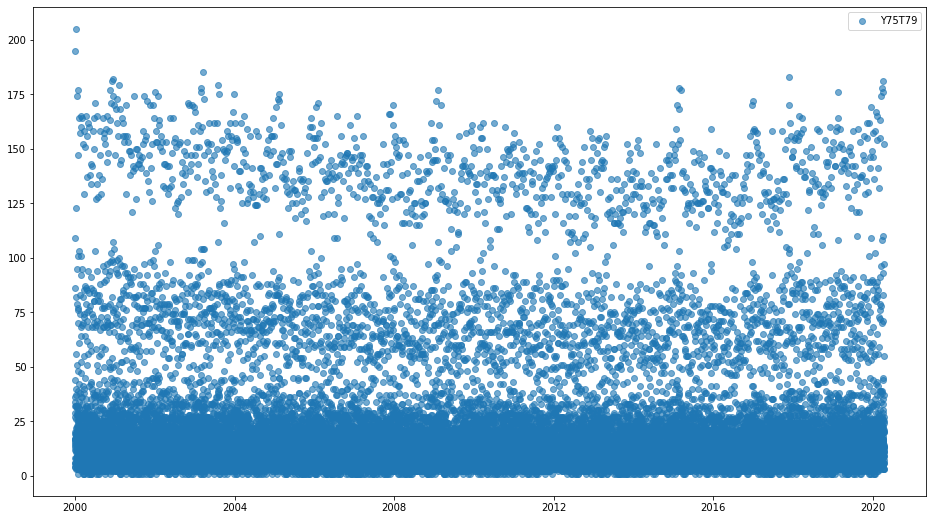

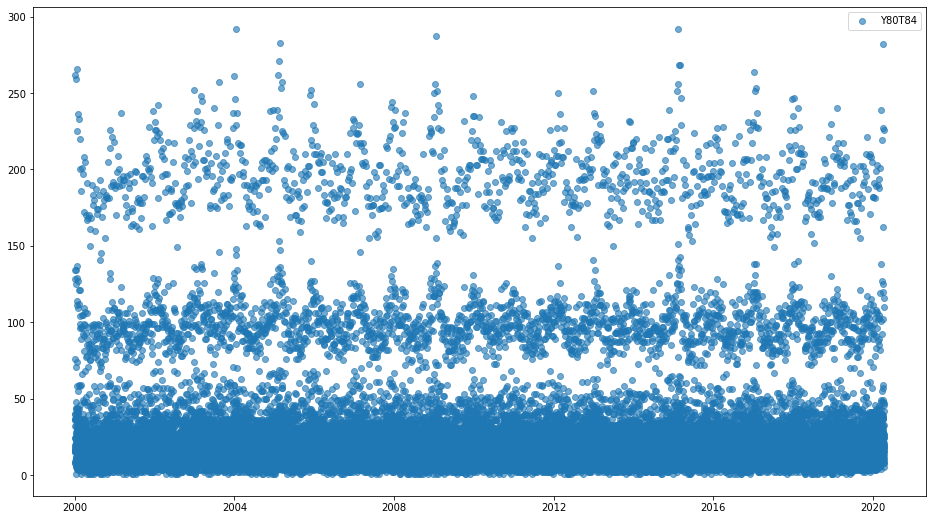

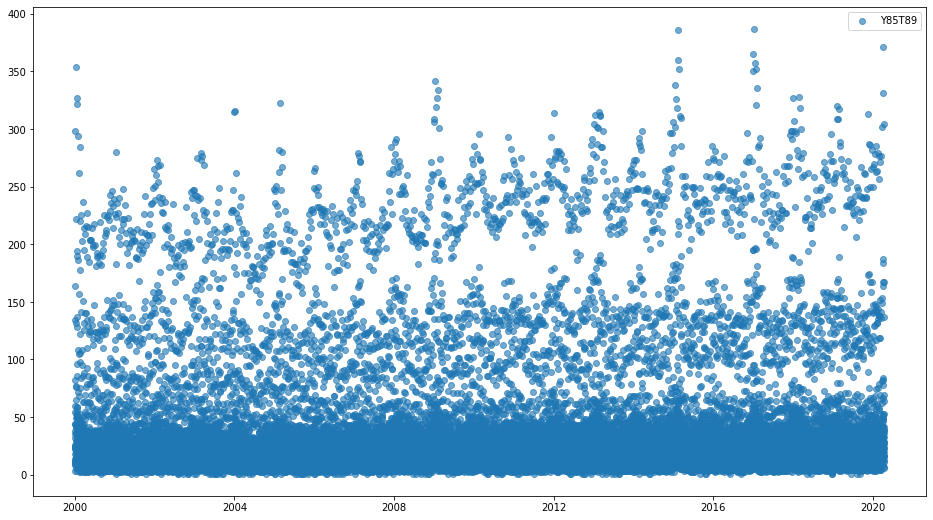

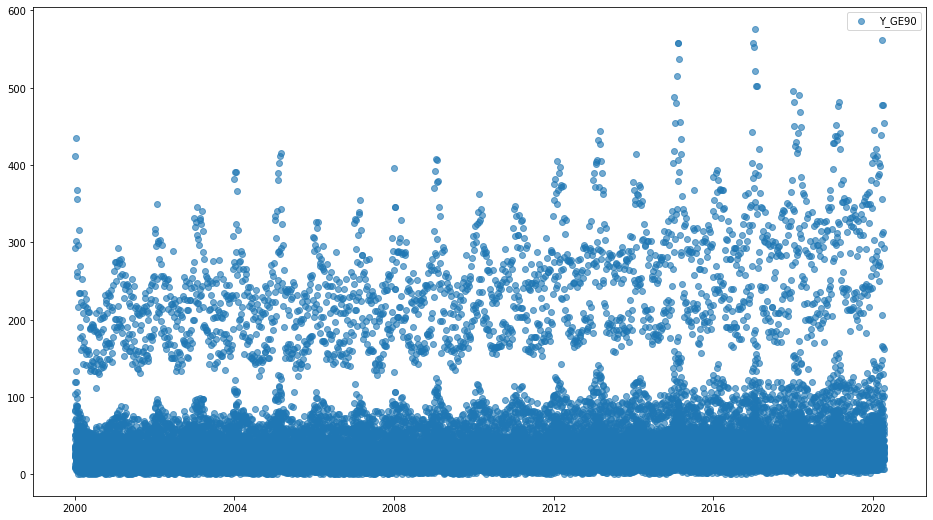

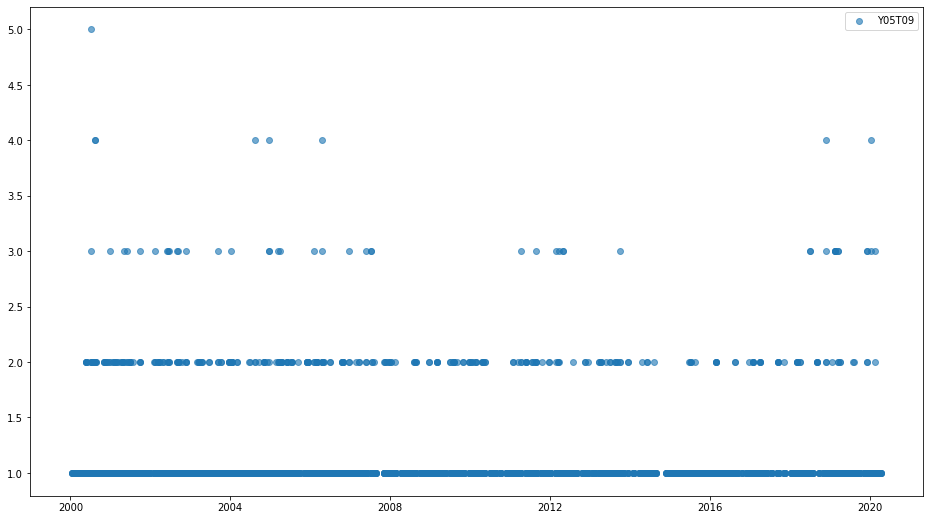

In [10]:
# Plot the data for each age
for age in data['AGE'].unique():
    plt.scatter(data[data.AGE==age]['ISOWEEK'], data[data.AGE==age]['Obs_value'], label=age, alpha=.618)
    plt.legend(loc='upper right')
    plt.show()